# Homework 3
**Student:**
- Dayana Valentina Gonzalez Vargas

## Libraries

In [7]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from sympy import lambdify

## First Part

## Second Part

**4. Consider the curve**
$$ \alpha (t) = (acos(t), bsin(t), t)$$
4.1 Show that torsion $\tau(t)$ for a curve $\alpha(t)$ is given by:
$$\tau(t) = - \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{|\alpha'(t) \times \alpha''(t)|^{2}}$$

4.2 Evalute the unit vectors $\hat{T(t)}$, $\hat{N(t)}$ and $\hat{B(t)}$

Important formulas to consider:
$$(1). \hat{T(t)} = \frac{\alpha'(s)}{|\alpha'(s)|}$$
$$(2). \hat{N}(t) = \frac{T'}{|T'|}$$
$$(3). \hat{B}(t) = \hat{T(t)} \times \hat{N(t)}$$


In [8]:
## Definimos la norma
def norma(x):
  return sp.sqrt(np.dot(x,x)).simplify()

In [9]:
## Definimos las variables y alpha
a,b = sp.symbols("a,b", positive = True, real = True)
s = sp.symbols("s")
x,y,z,alpha,dalpha,ddalpha,dddalpha,T,dT,N,B,k,tau = sp.symbols("x,y,z,alpha,dalpha,ddalpha,dddalpha,T,dT,N,B,k,tau", cls = sp.Function)
da_norma = sp.symbols ("da_norma", cls = sp.Function)

In [10]:
#Definimos las componentes de alpha
x = a*sp.cos(s)
y = b*sp.sin(s)
z = s
alpha = (x,y,z)
print('alpha(s) = ',alpha)
print('norma alpha = ', norma(alpha))

alpha(s) =  (a*cos(s), b*sin(s), s)
norma alpha =  sqrt(a**2*cos(s)**2 + b**2*sin(s)**2 + s**2)


**Graficar alpha**

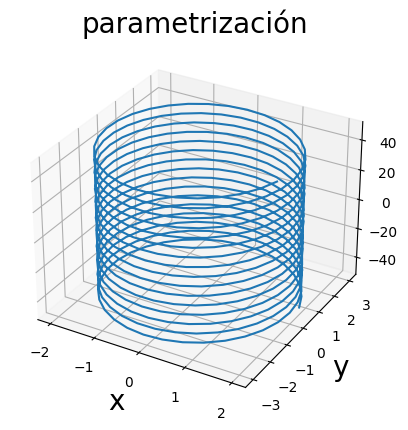

In [30]:
t = np.linspace(-50,50,500)
X = lambdify(s,x.subs(a,2).subs(b,3))(t)
Y = lambdify(s,y.subs(a,2).subs(b,3))(t)
Z = lambdify(s,z)(t)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

ax.set_title("parametrización", size=20)
ax.plot(X,Y,Z)

ax.set_xlabel("x", size = 20)
ax.set_ylabel("y", size = 20)

plt.show()

In [11]:
## Primera derivada de alpha
dalpha = (sp.diff(x,s), sp.diff(y,s), sp.diff(z,s))
da_norma = norma(dalpha)
print('primera derivada alpha =',dalpha)
print('norma =', da_norma)

primera derivada alpha = (-a*sin(s), b*cos(s), 1)
norma = sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)


#### *Vector Tanget*
$$(1). \hat{T(t)} = \frac{\alpha'(s)}{|\alpha'(s)|}$$

In [12]:
#Vector tangente unitario
T = (dalpha[0]/da_norma,dalpha[1]/da_norma,dalpha[2]/da_norma)
#Norma del vector tangente
da_norma = norma(T)
print('Vector tangente =',T)
print('norma =', da_norma)

Vector tangente = (-a*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1), b*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1), 1/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1))
norma = 1


In [13]:
# Primera derivada del vector tangente unitario
dT = (sp.diff(T[0],s), sp.diff(T[1],s), sp.diff(T[2],s))
# Norma de la primera derivada del vector tangente unitario
da_norma = norma(dT)
print('derivada del vector tangente =',dT)
print('norma =', da_norma)

derivada del vector tangente = (-a*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*sin(s)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2) - a*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1), b*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*cos(s)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2) - b*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1), (-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2))
norma = sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)


#### *Vector Normal*
$$(2). \hat{N}(t) = \frac{T'}{|T'|}$$

In [14]:
#Vector Normal unitario
N = (dT[0]/da_norma,dT[1]/da_norma,dT[2]/da_norma)
# Norma del vector normal unitario
da_norma = norma(N)
print('Vector Normal =',N)
print('norma =', da_norma)

Vector Normal = ((-a*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*sin(s)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2) - a*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1))/sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2), (b*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*cos(s)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2) - b*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1))/sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2), (-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))/(sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)*(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2)))
norma = 1


#### *Vector Binomial*
$$(3). \hat{B}(t) = \hat{T(t)} \times \hat{N(t)}$$


In [15]:
# Vector Binomial
B = np.cross(T,N)
B = (B[0].simplify(), B[1].simplify(), B[2].simplify())
# Norma del vector Binomial
da_norma = norma(B)
print('Vector Binomial =',B)
print('norma =', da_norma)

Vector Binomial = (b*sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)*(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2*sin(s)/((a**2*sin(s)**2 + b**2*cos(s)**2 + 1)*(a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)), a*sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)*(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2*cos(s)/((-a**2*sin(s)**2 - b**2*cos(s)**2 - 1)*(a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)), a*b/(sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)*(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)))
norma = 1


4.3 Evaluate curvature $k(t)$ and torsion $\tau(t)$ for $\alpha(t)$. Plot the funcitons $k(t)$ and $\tau(t)$,
use parameters a = 2 and b = 3 for plots.
Important formulas to consider:
$$(4). k(t) = \frac {|\alpha'(t) \times \alpha''(t)|}{|\alpha'|^{3}}$$
$$(5).\tau(t) = - \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{|\alpha'(t) \times \alpha''(t)|^{2}}$$


#### *Curvature $k(t)$*
$$(4). k(t) = \frac {|\alpha'(t) \times \alpha''(t)|}{|\alpha'|^{3}}$$


In [16]:
## Segunda derivada de alpha
ddalpha = (sp.diff(x,s,2), sp.diff(y,s,2), sp.diff(z,s,2))
da_norma = norma(ddalpha)
print('segunda derivada alpha =',ddalpha)
print('norma =', da_norma)

segunda derivada alpha = (-a*cos(s), -b*sin(s), 0)
norma = sqrt(a**2*cos(s)**2 + b**2*sin(s)**2)


In [17]:
## Curvatura 
k  = norma(np.cross(dalpha,ddalpha))/(norma(dalpha)**3)
print('Curvatura', k)

Curvatura sqrt(a**2*b**2 + a**2*cos(s)**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2)


#### *Torsion $\tau(t)$*
$$(5).\tau(t) = - \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{|\alpha'(t) \times \alpha''(t)|^{2}}$$

In [18]:
# Tercera derivada de alpha
dddalpha = (sp.diff(x,s,3), sp.diff(y,s,3), sp.diff(z,s,3))
da_norma = norma(ddalpha)
print('Tercera derivada alpha =',dddalpha)
print('norma =', da_norma)

Tercera derivada alpha = (a*sin(s), -b*cos(s), 0)
norma = sqrt(a**2*cos(s)**2 + b**2*sin(s)**2)


In [19]:
## Torsión
tau = - (np.dot(np.cross(dalpha,ddalpha),dddalpha)/(norma(np.cross(dalpha,ddalpha))**2))
print('torsion =', tau)

torsion = -(a*b*sin(s)**2 + a*b*cos(s)**2)/(a**2*b**2 + a**2*cos(s)**2 + b**2*sin(s)**2)


*Graphic*

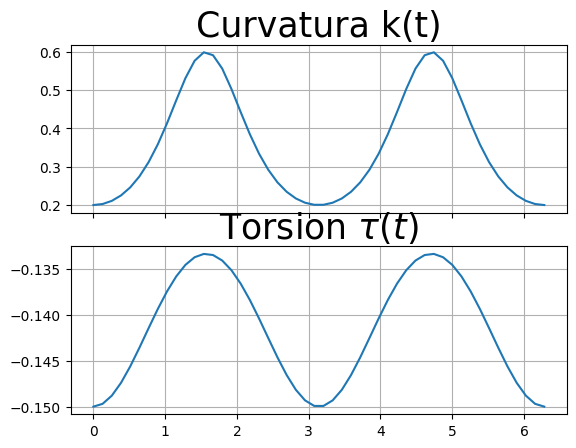

In [20]:
t = np.linspace(0,2*np.pi)
K = lambdify(s,k.subs(a,2).subs(b,3))(t)
Tau = lambdify(s,tau.subs(a,2).subs(b,3))(t)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t,K)
ax1.set_title(r"Curvatura k(t)", size=25)
ax1.grid(True)
ax2.plot(t,Tau)
ax2.set_title(r"Torsion $\tau(t)$", size=25)
ax2.grid(True)




4.4 Use libraries as matplotlib.pyplot.quiver in order to plot the vectors $\hat{T(t)}$, $\hat{N(t)}$ and $\hat{B(t)}$ on the curve.

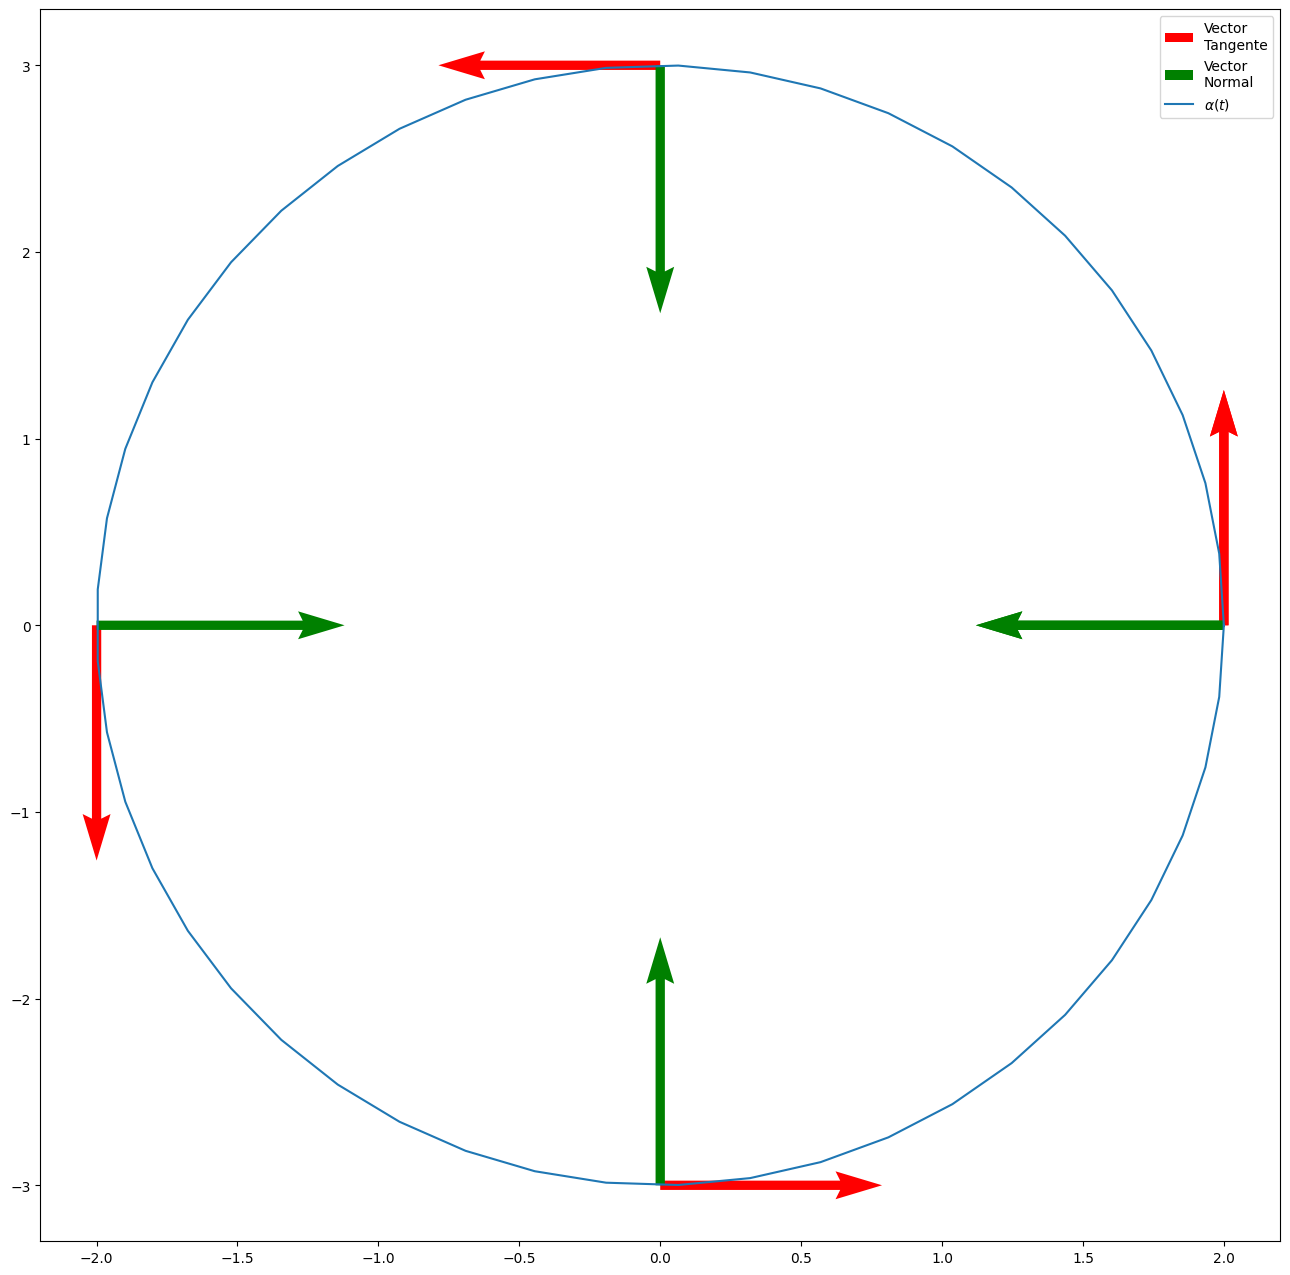

In [34]:
u = np.linspace(0,2*np.pi)
x_ = lambdify(s,x.subs(a,2).subs(b,3))(u)
y_ = lambdify(s,y.subs(a,2).subs(b,3))(u)
t = np.linspace(0, 2*np.pi, 5)
x_position = lambdify(s,x.subs(a,2).subs(b,3))(t) 
y_position = lambdify(s,y.subs(a,2).subs(b,3))(t)
# Dirección es el vector tangente
x_tanget = lambdify(s,T[0].subs(a,2).subs(b,3))(t)
y_tanget = lambdify(s,T[1].subs(a,2).subs(b,3))(t)
# Vector normal 
x_normal = lambdify(s,N[0].subs(a,2).subs(b,3))(t)
y_normal = lambdify(s,N[1].subs(a,2).subs(b,3))(t)
# grafics
fig , ax = plt.subplots(figsize = (16,16))
ax.quiver(x_position,y_position, x_tanget, y_tanget, scale = 5, color = 'red', label = 'Vector\nTangente')
ax.quiver(x_position,y_position, x_normal, y_normal, scale = 5, color = 'green', label = 'Vector\nNormal')
ax.plot(x_,y_, label = r"$\alpha (t)$")
plt.legend(loc = 1)
plt.show()

